<a href="https://colab.research.google.com/github/AnalyticsLover/Oxford-Happiness-Questionnaire-Analysis/blob/main/OHQ_Reporte_Analitico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='navy'><u>**Reporte analítico: El "Bien Estar" del Consejo Provincial de Educación del Neuquén**<a class="anchor" id="Plan"></a></font></u>
<font color='gray'><u>*Proyecto orquestrado por Dr. Pereyra Eugenio*<a class="anchor" id="Plan"></a></font></u>

<font color='gray'><u>*Análisis realizado por Pardini Lucia*<a class="anchor" id="Plan"></a></font></u>

---

#### **Descripción**

El siguiente reporte incluye información sobre la interpretación analítica de los resultados dados de luego realizado el cuestionario de la felicidad de la escuela de Oxford [(Oxford Happiness Questionnaire = OHQ)(Hills & Argyle, 2002)](https://psiquiatria.com/trabajos/usr_458986386152.pdf) en un cierto número de los empleados y colaboradores del Consejo Provincial de Educacion del Neuquén.

El OHQ es un cuestionario de 29 ítems que se puntúan mediante una escala tipo Likert de seis puntos, desde “totalmente en desacuerdo” (1) a “totalmente de acuerdo” (6), de manera que las posibles puntuaciones totales presentan un rango de 29 a 174, correspondiendo las puntuaciones más altas a mayores niveles de bienestar subjetivo.

#### **Diccionario de datos**

El set de datos utilizado para la investigación y análisis contiene 32 columnas y 125 registros. Contempla los resultados de los individuos que completaron el cuestionario, la interpretación de esos resultados y su categorización.

El set de datos es una **MUESTRA REPRESENTATIVA de la POBLACIÓN** la cual es objeto de estudio, tener en cuenta que solo una parte de la población (trabajadores del consejo) han sido encuestados y se han recolectado sus datos.

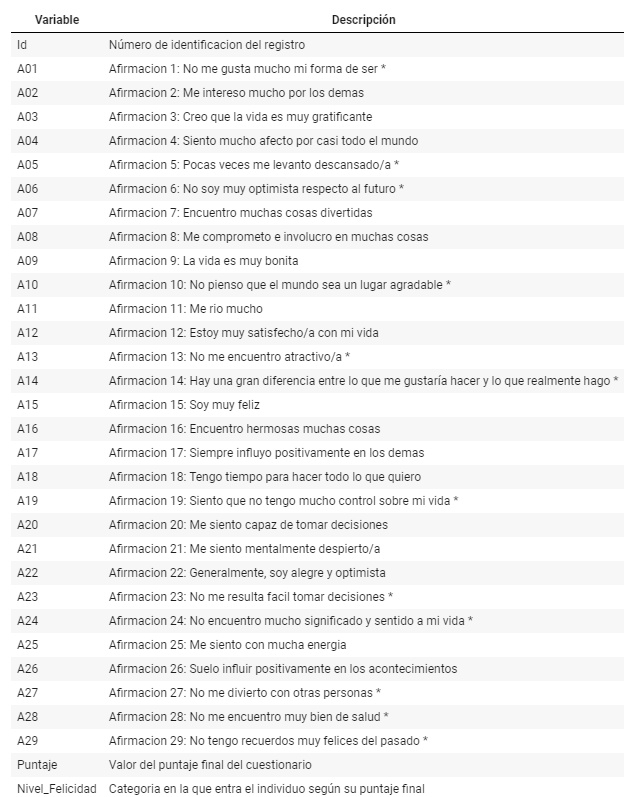

El procesamiento, limpieza y estructuración de los datos fueron realizados aparte, resultando en el archivo csv final utilizado en este reporte para el análisis.

[Ver el código aquí.](https://github.com/AnalyticsLover/Oxford-Happiness-Questionnaire-Analysis/blob/main/OHQ_cleaning_data.py)

#### **Pasos tomados para calcular el puntaje de felicidad**

  ✅ Los items (columnas) marcados con "*" fueron puntuados al revés:

  Se cambió “2″ a “5″

  Se cambió  “3″ a “4″

  Se cambió  “4″ a “3″

  Se cambió  “5″ a “2″

  Se cambió  “6″ a “1″

  ✅ Se sumaron los números de todas las 29 afirmaciones (usando los números convertidos)



  ✅ Se dividió por el total de afirmaciones. Entonces el puntaje de felicidad = el total de numeros / 29





  ✅ Se interpretaron los resultados de los puntajes de felicidad según la siguiente tabla:

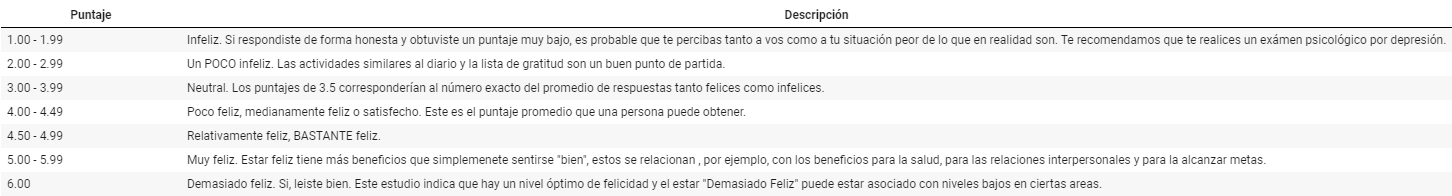
[Fuente de la tabla interpretativa](https://therapydave.com/docs/oxford-happiness-questionnaire.pdf)




### **Análisis Exploratorio de Datos (EDA)**


---

↪ Se vió la distribución de los datos por cada columna.

↪ Se calculó y analizó el coeficiente de variacion en cada columna.

↪ Se calculó el standard error y confidence intervals para todas las columnas.

↪ Se vieron posibles correlaciones entre variables.

↪ Se buscaron tendencias y patrones en los datos.

↪ Se vieron los promedios, percentiles y valores minimos y maximos en los datos.




```
# importando los paquetes necesarios
```



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t



```
# leyendo el archivo csv, pasandolo a un DataFrame y viendo su estructura
```



In [ ]:
ohq_df = pd.read_csv("/content/2024_11_OHQ_DatosLimpios.csv")

In [ ]:
ohq_df.head()

,Id,A01,A02,A03,A04,A05,A06,A07,A08,A09,...,A22,A23,A24,A25,A26,A27,A28,A29,Puntaje,Nivel_Felicidad
0,1,2,2,5,4,5,6,5,5,5,...,5,5,6,4,5,5,6,2,4.551724,Relativamente feliz
1,2,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,5.965517,Muy feliz
2,3,6,3,6,3,3,6,5,4,6,...,6,5,6,5,1,6,6,6,5.034483,Muy feliz
3,4,5,6,5,5,1,6,5,5,5,...,5,5,6,6,6,2,5,6,5.241379,Muy feliz
4,5,2,5,5,4,1,6,5,5,6,...,5,5,6,5,5,6,3,5,4.448276,Poco feliz o satisfecho




```
# pequeña muestra de la tabla de datos ⤴
```



In [ ]:
ohq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               125 non-null    int64  
 1   A01              125 non-null    int64  
 2   A02              125 non-null    int64  
 3   A03              125 non-null    int64  
 4   A04              125 non-null    int64  
 5   A05              125 non-null    int64  
 6   A06              125 non-null    int64  
 7   A07              125 non-null    int64  
 8   A08              125 non-null    int64  
 9   A09              125 non-null    int64  
 10  A10              125 non-null    int64  
 11  A11              125 non-null    int64  
 12  A12              125 non-null    int64  
 13  A13              125 non-null    int64  
 14  A14              125 non-null    int64  
 15  A15              125 non-null    int64  
 16  A16              125 non-null    int64  
 17  A17             

Todas las columnas que representan las afirmaciones del cuestionario **(A01-A29)** son de tipo **int64**, esto quiere decir que sus valores son numeros enteros.

La columna **Puntaje** es de tipo **float64**, es decir que sus valores son numeros decimales.


Por ultimo, la columna **Nivel Felicidad** es de tipo **object**, lo que refiere que sus valores estan compuestos por caracteres alfanumericos. Esta es una variable categorica ya que categoriza los datos en formato de texto.

Todas las columnas contienen **125 non-null**, lo que indica que no hay valores faltantes en la tabla ya que esto fue resuelto en una instancia previa.



```
# obteniendo carecteristicas descriptivas del set de datos
```



In [ ]:
ohq_df.describe(include="all")

,Id,A01,A02,A03,A04,A05,A06,A07,A08,A09,...,A22,A23,A24,A25,A26,A27,A28,A29,Puntaje,Nivel_Felicidad
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,...,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muy feliz
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43
mean,71.976000,4.576000,4.808000,4.952000,4.000000,3.30400,4.536000,4.992000,4.752000,5.264000,...,5.024000,4.152000,5.368000,4.376000,4.464000,4.800000,4.632000,4.680000,4.638345,NaN
std,42.040584,1.690886,1.287007,1.262716,1.431219,1.66183,1.739225,1.266797,1.280474,1.093559,...,1.050837,1.685115,1.298485,1.305472,1.167738,1.545023,1.663343,1.599395,0.648503,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.241379,NaN
25%,36.000000,3.000000,4.000000,4.000000,3.000000,2.00000,3.000000,4.000000,4.000000,5.000000,...,5.000000,3.000000,6.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.206897,NaN
50%,72.000000,5.000000,5.000000,5.000000,4.000000,3.00000,5.000000,5.000000,5.000000,6.000000,...,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.724138,NaN
75%,108.000000,6.000000,6.000000,6.000000,5.000000,5.00000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,5.000000,5.000000,6.000000,6.000000,6.000000,5.137931,NaN


In [ ]:
ohq_df[["A10", "A11", "A12", "A13", "A14", "A15", "A16", "A17", "A18", "A19", "A20"]].describe()

,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
count,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,4.704000,5.04000,5.048000,4.368000,3.648000,4.776000,5.176000,4.488000,3.248000,4.624000,5.544000
std,1.670542,0.99515,1.156022,1.663343,1.695611,1.217242,1.055431,1.140289,1.604711,1.538034,0.798224
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000
25%,4.000000,5.00000,5.000000,3.000000,2.000000,4.000000,5.000000,4.000000,2.000000,3.000000,5.000000
50%,6.000000,5.00000,5.000000,5.000000,3.000000,5.000000,6.000000,5.000000,3.000000,5.000000,6.000000
75%,6.000000,6.00000,6.000000,6.000000,5.000000,6.000000,6.000000,5.000000,5.000000,6.000000,6.000000
max,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


Tabla descriptiva del dataset indica:

☑ El **promedio** de la columna **"Puntaje"** es de **4.63**
Es decir que en promedio los individuos obtuvieron un puntaje de 4.63 que indica un nivel de felicidad relativamente elevado, siendo este el tercero más alto.

☑ Cada punto de la columna "Puntaje" tiene una **deviacion standard** (Indica cuánto varían las respuestas en una pregunta en relación con el promedio) de **0.64**, indicando una homogeniedad en las respuestas. Es decir, los empleados tienden a estar de acuerdo o a coincidir en sus respuestas.

☑ A su vez, **el rango de respuestas completo** (1-6) **fue utilizado para la mayoría de las preguntas**, mostrando que existen algunas diferencias individuales en las percepciones de felicidad pero estas no son significativas.

☑ El **mínimo puntaje** conseguido es de **2.24**, indicando una leve infelicidad y entrando en el segundo nivel mas bajo de felicidad.

☑ El **máximo puntaje** conseguido es de **5.96**, siendo este casi perfecto e indicando un nivel de "demasiada" felicidad.

☑ El **75%** de los **participantes** obtuvieron un **puntaje** por debajo de **5.13**.

☑ El **50%** de los **participantes** obtuvieron un **puntaje** por arriba o por debajo de **4.72**, siendo este el valor medio de toda las respuestas.

☑ El **25%** de los **participantes** obtuvieron un **puntaje** por debajo de **4.20**.



---

☑ La categoría de felicidad más frecuente es **"Muy feliz"**, estando esta presente **43** veces en el set de datos.

Esto quiere decir que los participantes se agrupan mayormente en la categoría de “Muy feliz”, con menos personas en los extremos de “Infeliz” o “Demasiado feliz”. Esto respalda una tendencia general positiva entre los encuestados, evitando extremismos.


---

☑ En todas las 29 preguntas (columnas) la respuesta mas alta fue de 6. No hubo ni una sola columna donde el valor mas alto posible de respuesta no esté presente.

☑ Solo 2 de las 29 preguntas NO tuvieron la respuesta más baja (1) presente.
Las respuestas a las **columnas "A16" y "A20" tuvieron un valor mínimo de 2**.

Afirmacion 16: Encuentro hermosas muchas cosas

Afirmacion 20: Me siento capaz de tomar decisiones

No hubieron encuestados que estuvieran **TOTALMENTE EN DESACUERDO** con estas dos afirmaciones. En cambio, si hubieron aquellos que estuvieron moderadamente en desacuerdo.




```
# calculando el coeficiente de variación en todas las columnas menos Puntaje y Nivel Felicidad
```



In [ ]:
mean = ohq_df[["A01", "A02", "A03", "A04", "A05", "A06", "A07", "A08", "A09", "A10", "A11", "A12", "A13", "A14", "A15", "A16", "A17", "A18", "A19", "A20","A21", "A22", "A23", "A24", "A25", "A26", "A27", "A28", "A29"]].mean()
std= ohq_df[["A01", "A02", "A03", "A04", "A05", "A06", "A07", "A08", "A09", "A10", "A11", "A12", "A13", "A14", "A15", "A16", "A17", "A18", "A19", "A20","A21", "A22", "A23", "A24", "A25", "A26", "A27", "A28", "A29"]].std()

cv = (std / mean) * 100

cv_df = pd.DataFrame({
    'Coeficiente_Variacion': cv
})
cv_df.sort_values(by='Coeficiente_Variacion', ascending=False)

,Coeficiente_Variacion
A05,50.297504
A18,49.406121
A14,46.480566
A23,40.585624
A06,38.342700
A13,38.080195
A01,36.951189
A28,35.909821
A04,35.780469
A10,35.513217


Interpretación del coeficiente de variación:

❗**Muy alto (≥ 40%)**: Estos valores, como los de las **columnas A05, A18, y A14**, representan una dispersión considerable en las respuestas y pueden ser considerados estadísticamente muy significativos en cuanto a variabilidad. La diferencia en opiniones/percepciones en estas preguntas es notable y merecere atención.

❗ **Alto (30-39%)**: Columnas **A06, A13, A01, A28,	A04,	A10,	A29,	A19, y	A27** también muestran alta variabilidad y podrían reflejar una diversidad significativa de opiniones. No es tan extrema como la categoría anterior, pero sigue siendo notable.

### **¿Qué tanto representan los resultados  a la población real?**


---



Cuando se trabaja con datos de una muestra en lugar de una población completa, se suele preguntar: ¿Qué tan representativos son los resultados de la muestra respecto a la población total? Es decir, se quiere saber qué tan confiables son las estadísticas calculadas a partir de la muestra (como la media) y qué tanto se acercan a las estadísticas reales de toda la población.

Uno de los conceptos clave es el **error estándar (Standard Error, SE)**. El error estándar mide cuánto varían las estadísticas de la muestra si se repitiera el proceso de muestreo muchas veces.

Un SE más bajo indica que la media de la muestra está más cerca de la media de la población, lo que aumenta la confiabilidad de los resultados.

Además, se calcula un **intervalo de confianza (Confidence Interval, CI)** para estimar el rango dentro del cual, con cierto nivel de confianza (generalmente 95%), se espera que se encuentre la verdadera estadística poblacional.

In [ ]:
# Calcular el error estándar (SE) para cada pregunta
n = len(ohq_df)  # tamaño de la muestra
se = std / np.sqrt(n)
se_df = pd.DataFrame(se, columns=['SE'])
se_df.sort_values(by='SE', ascending=False)

#calcular el intervalo de confianza

confianza = 0.95 # 95%
alpha = 1 - confianza
t_critical = t.ppf(1 - alpha / 2, df=n - 1)  # Valor crítico t
margen_error = t_critical * se  # Margen de error
ci_lower = mean - margen_error  # Límite inferior
ci_upper = mean + margen_error  # Límite superior
# Crear una columna con el intervalo de confianza formateado
se_df["Intervalo de Confianza"] = np.where(
    np.round(ci_lower, 0) != np.round(ci_upper, 0),  # Si los límites son diferentes
    "95%Cl[" + np.round(ci_lower, 0).astype(str) + " - " + np.round(ci_upper, 0).astype(str) + "]",  # Mostrar ambos límites
    "95%Cl[" + np.round(ci_lower, 0).astype(str) + "]"  # Si son iguales, mostrar solo un valor
)
se_df.sort_values(by='SE', ascending=True)

,SE,Intervalo de Confianza
A20,0.071395,95%Cl[5.0 - 6.0]
A11,0.089009,95%Cl[5.0]
A21,0.089972,95%Cl[5.0]
A22,0.093990,95%Cl[5.0]
A16,0.094401,95%Cl[5.0]
A09,0.097811,95%Cl[5.0]
A17,0.101991,95%Cl[4.0 - 5.0]
A12,0.103398,95%Cl[5.0]
A26,0.104446,95%Cl[4.0 - 5.0]
A15,0.108873,95%Cl[5.0]


▶ Los resultados presentan un SE bajo todas las preguntas, con **valores menores a 0.16**, esto sugiere que las medias de las respuestas a las preguntas del cuestionario son estimaciones consistentes y confiables.

▶  Se puede concluir que los las respuestas promedio de cada pregunta representan de manera precisa la respuesta promedio poblacional para cada pregunta.

▶ La variabilidad dentro de cada ítem es lo suficientemente baja como para confiar en que estos resultados no son aleatorios ni producto del sampleo de la muestra, sino que reflejan con fidelidad la opinión de la población sobre cada afirmación del cuestionario.

▶ Preguntas como **A02, A03, y A11** tienen Intervalos de Confianza muy precisos ("95%Cl[5.0]"), lo que refleja poca variabilidad en las respuestas. Esto sugiere un alto grado de consenso entre los encuestados.


▶ Preguntas con Intervalos de Confianza más amplios, como **A05** (95%Cl**[3.0 - 4.0]**) y A18 (95%Cl**[3.0 - 4.0]**), reflejan mayor diversidad en las opiniones, lo que podría indicar áreas donde las percepciones están menos alineadas.

▶ Preguntas con SE más alto, como A06 (0.156) y A14 (0.152), tienden a tener IC más amplios. Esto refleja mayor incertidumbre en la estimación de su media poblacional.

▶ Preguntas con un solo intervalo (por ejemplo, **A02, A03, A11**): Estas reflejan respuestas consistentes, indicando que los encuestados tienden a acordar con afirmaciones relacionadas con aspectos de su bienestar.


---


Teniendo lo mencionado previamente en cuenta:

✔ Con un nivel de confianza del 95% se puede decir que, en promedio, los encuestados se encuentran de moderada a totalmente de acuerdo en decir que **se sienten capaz de tomar decisiones.**

✔ Con un nivel de confianza del 95% se puede decir que, en promedio, los encuestados se encuentran de moderadamente de acuerdo en decir que **se rien mucho.**

✔ Con un nivel de confianza del 95% se puede decir que, en promedio, los encuestados se encuentran de moderadamente de acuerdo en decir que **se sienten mentalmente despiertos.**


✔ Con un nivel de confianza del 95% se puede decir que, en promedio, los encuestados se encuentran de moderadamente de acuerdo en decir que **generalmente son alegres y optimistas.**


✔ Con un nivel de confianza del 95% se puede decir que, en promedio, los encuestados se encuentran de en ligero desacuerdo a en ligeramente de acuerdo en decir que **tienen tiempo para hacer todo lo que quieren.**

✔ Con un nivel de confianza del 95% se puede decir que, en promedio, los encuestados se encuentran de en ligero desacuerdo a en ligeramente de acuerdo en decir que **pocas veces se levantan descansados.**


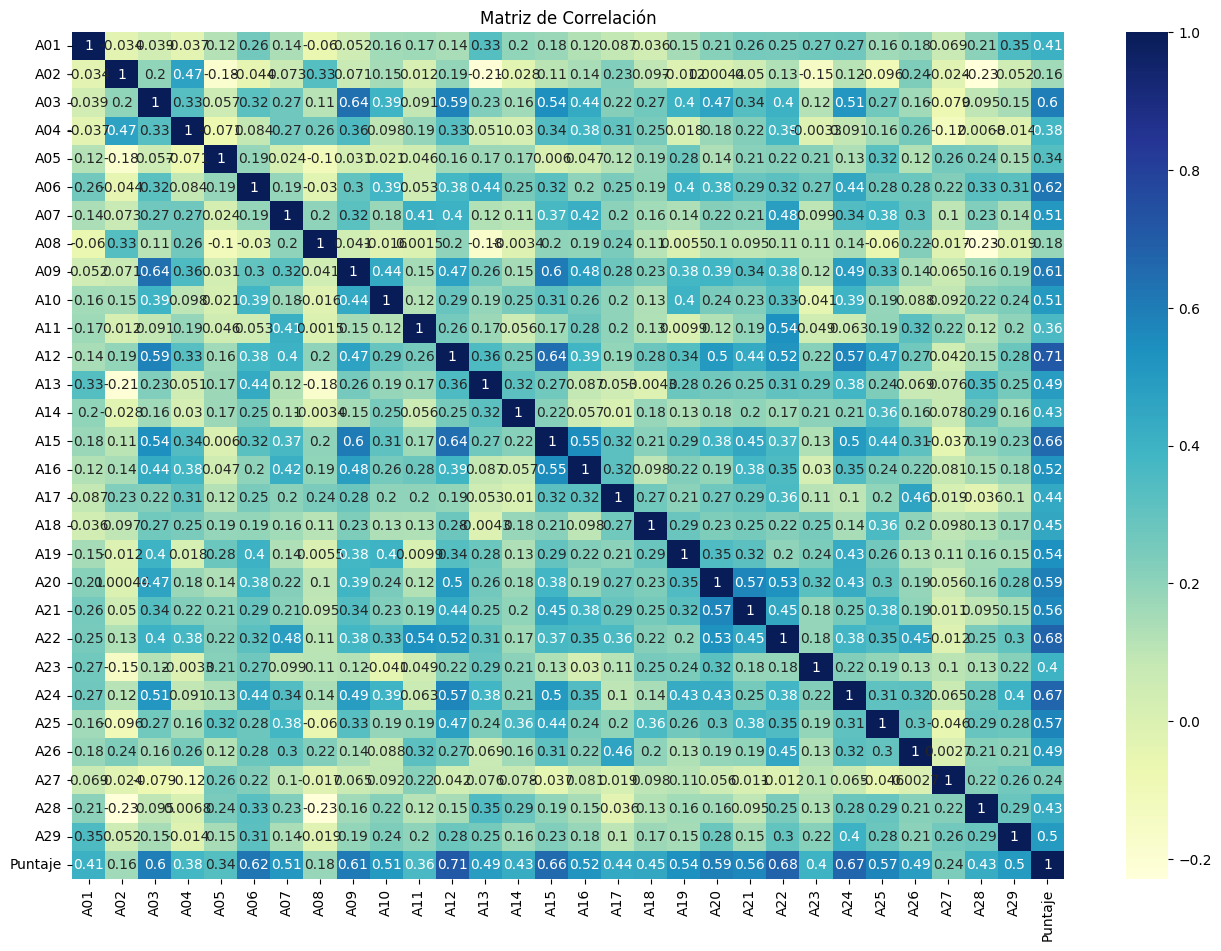

In [ ]:
matrix_df = ohq_df[['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09',
       'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19',
       'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'Puntaje']]
corr = matrix_df.corr()

plt.figure(figsize=(16, 11))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Matriz de Correlación")
plt.show()


Una matrix de correlación es una representación visual de la relación lineal entre diferentes variables de un conjunto de datos

> **¿Cómo leo el gráfico?**

Para leer un matriz de correlación, observa la intensidad de los colores: los tonos más oscuros o intensos indican una correlacion más alta, mientras que los tonos más claros representan una correlación mas baja o neutra. Usa la escala de colores (leyenda a la derecha del grafico) para entender la correlación de las variables.

```
Busca una combinación de 2 columnas diferentes para saber como estas se correlacionan:

▶ Valores cercanos a 1 : Indica una correlacion positiva fuerte. Cuando una variable aumenta, la otra también tiende a aumentar.
▶ Valores cercanos a 0 : Indica una correlación débil o nula. No existe una relación lineal clara entre las variables.
▶ Valores cercanos a -1: Indica una correlación negativa fuerte.
Cuando una variable aumenta, la otra tiende a disminuir y biseversa.
```

*Nota: La diagonal principal siempre tiene valores 1, ya que cada variable está perfectamente correlacionada consigo misma.
Obviar estas celdas.*

Entre las correlaciones **mas altas** de la matrix se encuentran:
- Las preguntas **A15** y **A12**, con una correlación positiva de **0.64**.

- Las preguntas **A09** y **A03**, con una correlación positiva de **0.64**.

- Las preguntas **A09** y **A15**, con una correlación positiva de **0.60**.

- La columna **Puntaje** tiene correlaciones superiores a **0.6** con las preguntas **A03, A06, A09, A12, A15, A22 y A24**.


---
Entre las correlaciones **mas bajas** de la matrix se encuentran:

-  La pregunta **A28**, que tiene una correlación negativa de **-0.23** con las preguntas **A02** y **A08**.

- Las preguntas **A13 y A02** tienen una correlacion negativa de **-0.21**.

- Las preguntas **A13 y A08** tienen una correlacion negativa de **-0.18**.


---



⛔ **IMPORTANTE:** *Correlación no implica causalidad. Estos valores solo indican la fuerza y dirección de una relación lineal entre las variables, no que una cause la otra.*

> `viendo el promedio de respuestas por cada columna (agrupadas por cada categoria de felicidad) a través de un mapa de intesidad`

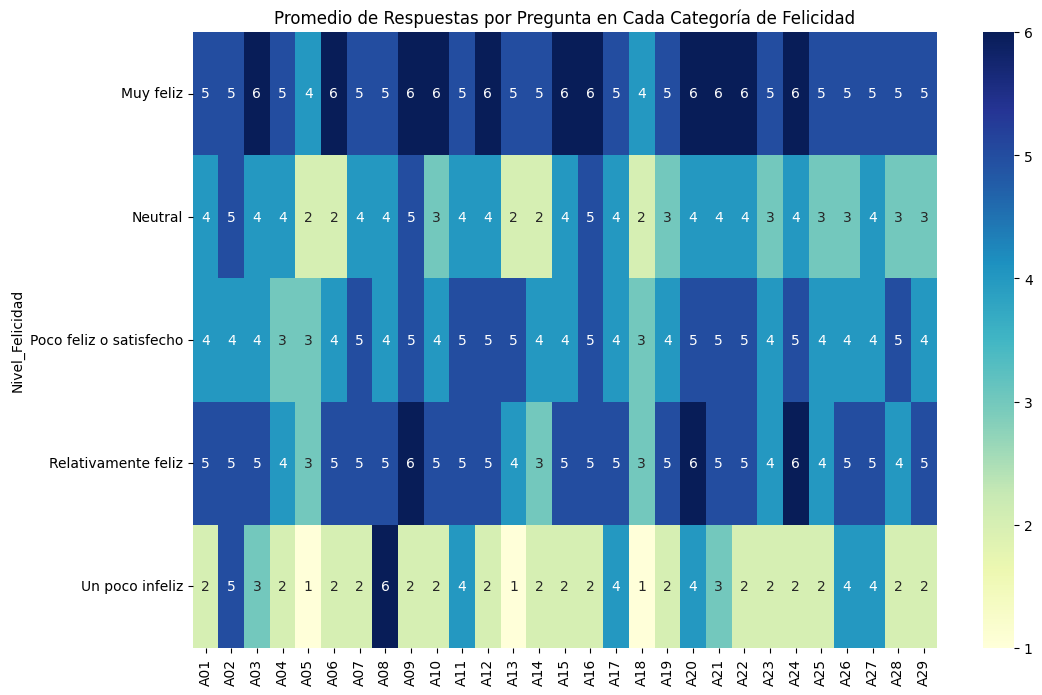

In [ ]:
avg_per_category = ohq_df[['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09',
       'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19',
       'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'Nivel_Felicidad']].groupby('Nivel_Felicidad').mean()
avg_per_category = avg_per_category.apply(lambda x: round(x, 0))

plt.figure(figsize=(12, 8))
sns.heatmap(avg_per_category, annot=True, cmap="YlGnBu")
plt.title("Promedio de Respuestas por Pregunta en Cada Categoría de Felicidad")
plt.show()



> **¿Cómo leo el gráfico?**

Para leer un mapa de intensidad, observa la intensidad de los colores: los tonos más oscuros o intensos indican valores más altos, mientras que los tonos más claros representan valores más bajos. Usa la escala de colores (leyenda a la derecha del grafico) para entender el rango exacto de los datos.

```
Las columnas se encuentran debajo y las categorias de felicidad a la izquierda.
Busca una combinación de columna - categoria para saber su respuesta promedio.
```

*Nota: Tener en cuenta aquellas columnas en las que las respuestas están invertidas*




> **Resultados:**

**Relación entre preguntas y felicidad:**

Se observa que, en general, las categorías con mayor felicidad tienen respuestas promedio más altas (celdas más azules) en preguntas relacionadas con emociones positivas, como satisfacción, optimismo y disfrute.

Por ejemplo:

- Las preguntas como A09 ("La vida es muy bonita") y A12 ("Estoy muy satisfecho/a con mi vida") tienen puntajes consistentemente altos en esta categoría.

- En contraste, preguntas como A06 ("No soy muy optimista respecto al futuro") y A19 ("Siento que no tengo mucho control sobre mi vida") tienen puntajes más bajos, especialmente en las categorías menos felices.

- Categorías menos felices ("Poco Feliz"):
Estas muestran valores promedio más bajos (celdas amarillas), indicando respuestas mas bajas.

**Diferencias notables entre categorías:**

- Preguntas que reflejan grandes variaciones entre categorías (contrastes claros en el heatmap):

- A15 ("Soy muy feliz") y A03 ("Creo que la vida es muy gratificante") tienen un incremento claro en el promedio conforme aumenta el nivel de felicidad.


**Preguntas con menos variación:**

- Algunas preguntas, como A05 ("Pocas veces me levanto descansado/a"), muestran promedios más consistentes entre categorías, esto significa que las respuestas dpromedio som homogeneas en todas los niveles de felicidad.

- Pregunta A20 ("Me siento capaz de tomar decisiones") presenta valores promedio altos (> 4) en todas las categorías.

- En contraste preguntas A05 y A18 ("Tengo tiempo para hacer todo lo que quiero") presentan valores bajos (< 4) en todas las categorías de felicidad.

In [ ]:
columnas = ["A01", "A02", "A03", "A04", "A05", "A06", "A07", "A08", "A09", "A10",
             "A11", "A12", "A13", "A14", "A15", "A16", "A17", "A18", "A19", "A20",
             "A21", "A22", "A23", "A24", "A25", "A26", "A27", "A28", "A29"]

# Crear un diccionario para almacenar la distribución de probabilidad
distribucion_probabilidad = {}

for col in columnas:
    # Calcular las frecuencias
    frecuencia = ohq_df[col].value_counts(normalize=True)  # `normalize=True` calcula las probabilidades directamente
    distribucion_probabilidad[col] = frecuencia

# Convertir a DataFrame para ver la distribución de probabilidad
distribucion_probabilidad_df = pd.DataFrame(distribucion_probabilidad).fillna(0)  # Llena valores NaN con 0 si alguna respuesta falta

distribucion_probabilidad_df


,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29
1,0.072,0.024,0.024,0.056,0.192,0.072,0.016,0.016,0.016,0.064,...,0.000,0.008,0.016,0.056,0.024,0.032,0.024,0.048,0.048,0.040
2,0.104,0.064,0.040,0.112,0.160,0.136,0.064,0.072,0.016,0.104,...,0.008,0.000,0.016,0.192,0.040,0.080,0.040,0.072,0.136,0.120
3,0.088,0.056,0.056,0.184,0.208,0.080,0.040,0.064,0.048,0.064,...,0.024,0.064,0.040,0.120,0.072,0.112,0.104,0.104,0.080,0.096
4,0.112,0.144,0.168,0.232,0.152,0.064,0.136,0.184,0.096,0.120,...,0.072,0.160,0.160,0.120,0.024,0.216,0.296,0.080,0.088,0.072
5,0.160,0.360,0.264,0.256,0.168,0.192,0.280,0.320,0.256,0.128,...,0.208,0.280,0.392,0.200,0.088,0.376,0.352,0.200,0.168,0.208
6,0.464,0.352,0.448,0.160,0.120,0.456,0.464,0.344,0.568,0.520,...,0.688,0.488,0.376,0.312,0.752,0.184,0.184,0.496,0.480,0.464


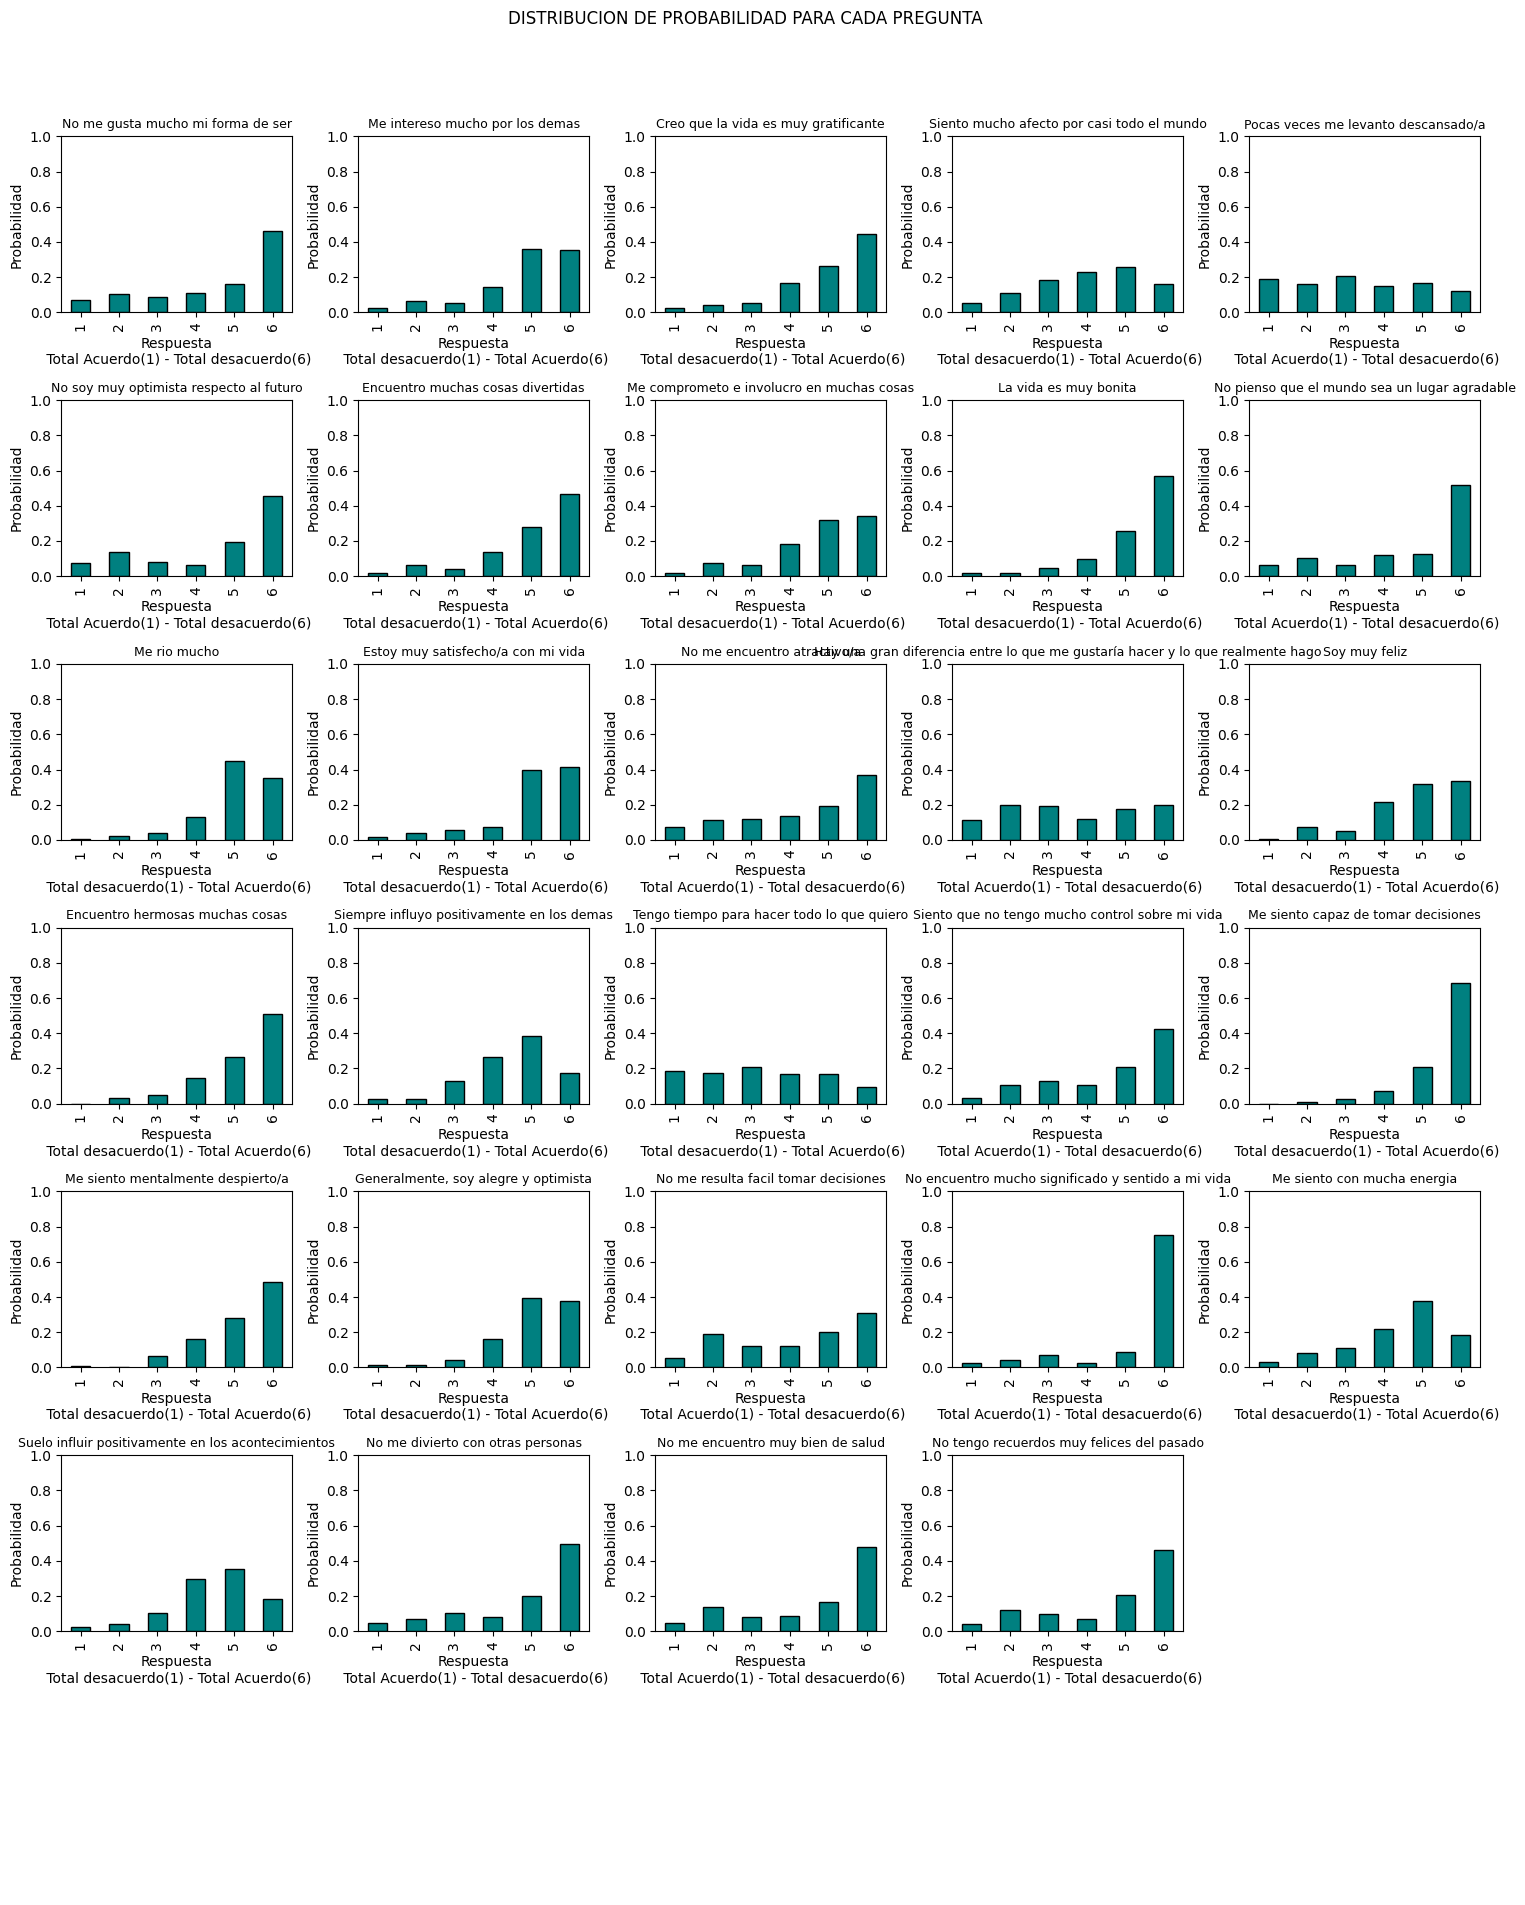

In [ ]:
# creando diccionario con la transcripcion de cada columna
preg = {"A01": "No me gusta mucho mi forma de ser",
               "A02": "Me intereso mucho por los demas",
               "A03": "Creo que la vida es muy gratificante",
               "A04": "Siento mucho afecto por casi todo el mundo",
               "A05": "Pocas veces me levanto descansado/a",
               "A06": "No soy muy optimista respecto al futuro",
               "A07": "Encuentro muchas cosas divertidas",
               "A08": "Me comprometo e involucro en muchas cosas",
               "A09": "La vida es muy bonita",
               "A10": "No pienso que el mundo sea un lugar agradable",
               "A11": "Me rio mucho",
               "A12": "Estoy muy satisfecho/a con mi vida",
               "A13": "No me encuentro atractivo/a",
               "A14": "Hay una gran diferencia entre lo que me gustaría hacer y lo que realmente hago",
               "A15": "Soy muy feliz",
               "A16": "Encuentro hermosas muchas cosas",
               "A17": "Siempre influyo positivamente en los demas",
               "A18": "Tengo tiempo para hacer todo lo que quiero",
               "A19": "Siento que no tengo mucho control sobre mi vida",
               "A20": "Me siento capaz de tomar decisiones",
               "A21": "Me siento mentalmente despierto/a",
               "A22": "Generalmente, soy alegre y optimista",
               "A23": "No me resulta facil tomar decisiones",
               "A24": "No encuentro mucho significado y sentido a mi vida",
               "A25": "Me siento con mucha energia",
               "A26": "Suelo influir positivamente en los acontecimientos",
               "A27": "No me divierto con otras personas",
               "A28": "No me encuentro muy bien de salud",
               "A29": "No tengo recuerdos muy felices del pasado"}
# creando un subplot
fig, axes = plt.subplots(7, 5, figsize=(15, 20))
fig.suptitle("DISTRIBUCION DE PROBABILIDAD PARA CADA PREGUNTA")
axes = axes.flatten()
# creando un for loop para crear un grafico de dispersion por cada columna
for i, col in enumerate(columnas): #extrayendo el indice y nombre de columna
  for key, value in preg.items(): #extrayendo el nombre de columna y su transcripcion
    if key == col:
      distribucion = distribucion_probabilidad_df[col]

      distribucion.plot(kind='bar', ax=axes[i], color="teal", edgecolor="black") #creando el grafico de distribucion
      axes[i].set_title(f"{value}", fontsize=9) #estableciendo el titulo = afirmacion completa
      if col in ["A01", "A05", "A06", "A10", "A13", "A14", "A19", "A23", "A24", "A27", "A28", "A29"]: # columnas con valores invertidos
        axes[i].set_xlabel("Respuesta\n Total Acuerdo(1) - Total desacuerdo(6)")
      else:
        axes[i].set_xlabel("Respuesta\n Total desacuerdo(1) - Total Acuerdo(6)")
      axes[i].set_ylabel("Probabilidad")
      axes[i].set_ylim(0, 1)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # estableciendo espacio entre los graficos

plt.savefig("distribucion_prob.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()

#  APRETAR "MOSTRAR SALIDA OCULTA" PARA VER EL GRAFICO EN TAMAÑO REAL, DEBAJO DE ESTA CELDA SE ENCUENTRA UNA IMAGEN DEL MISMO

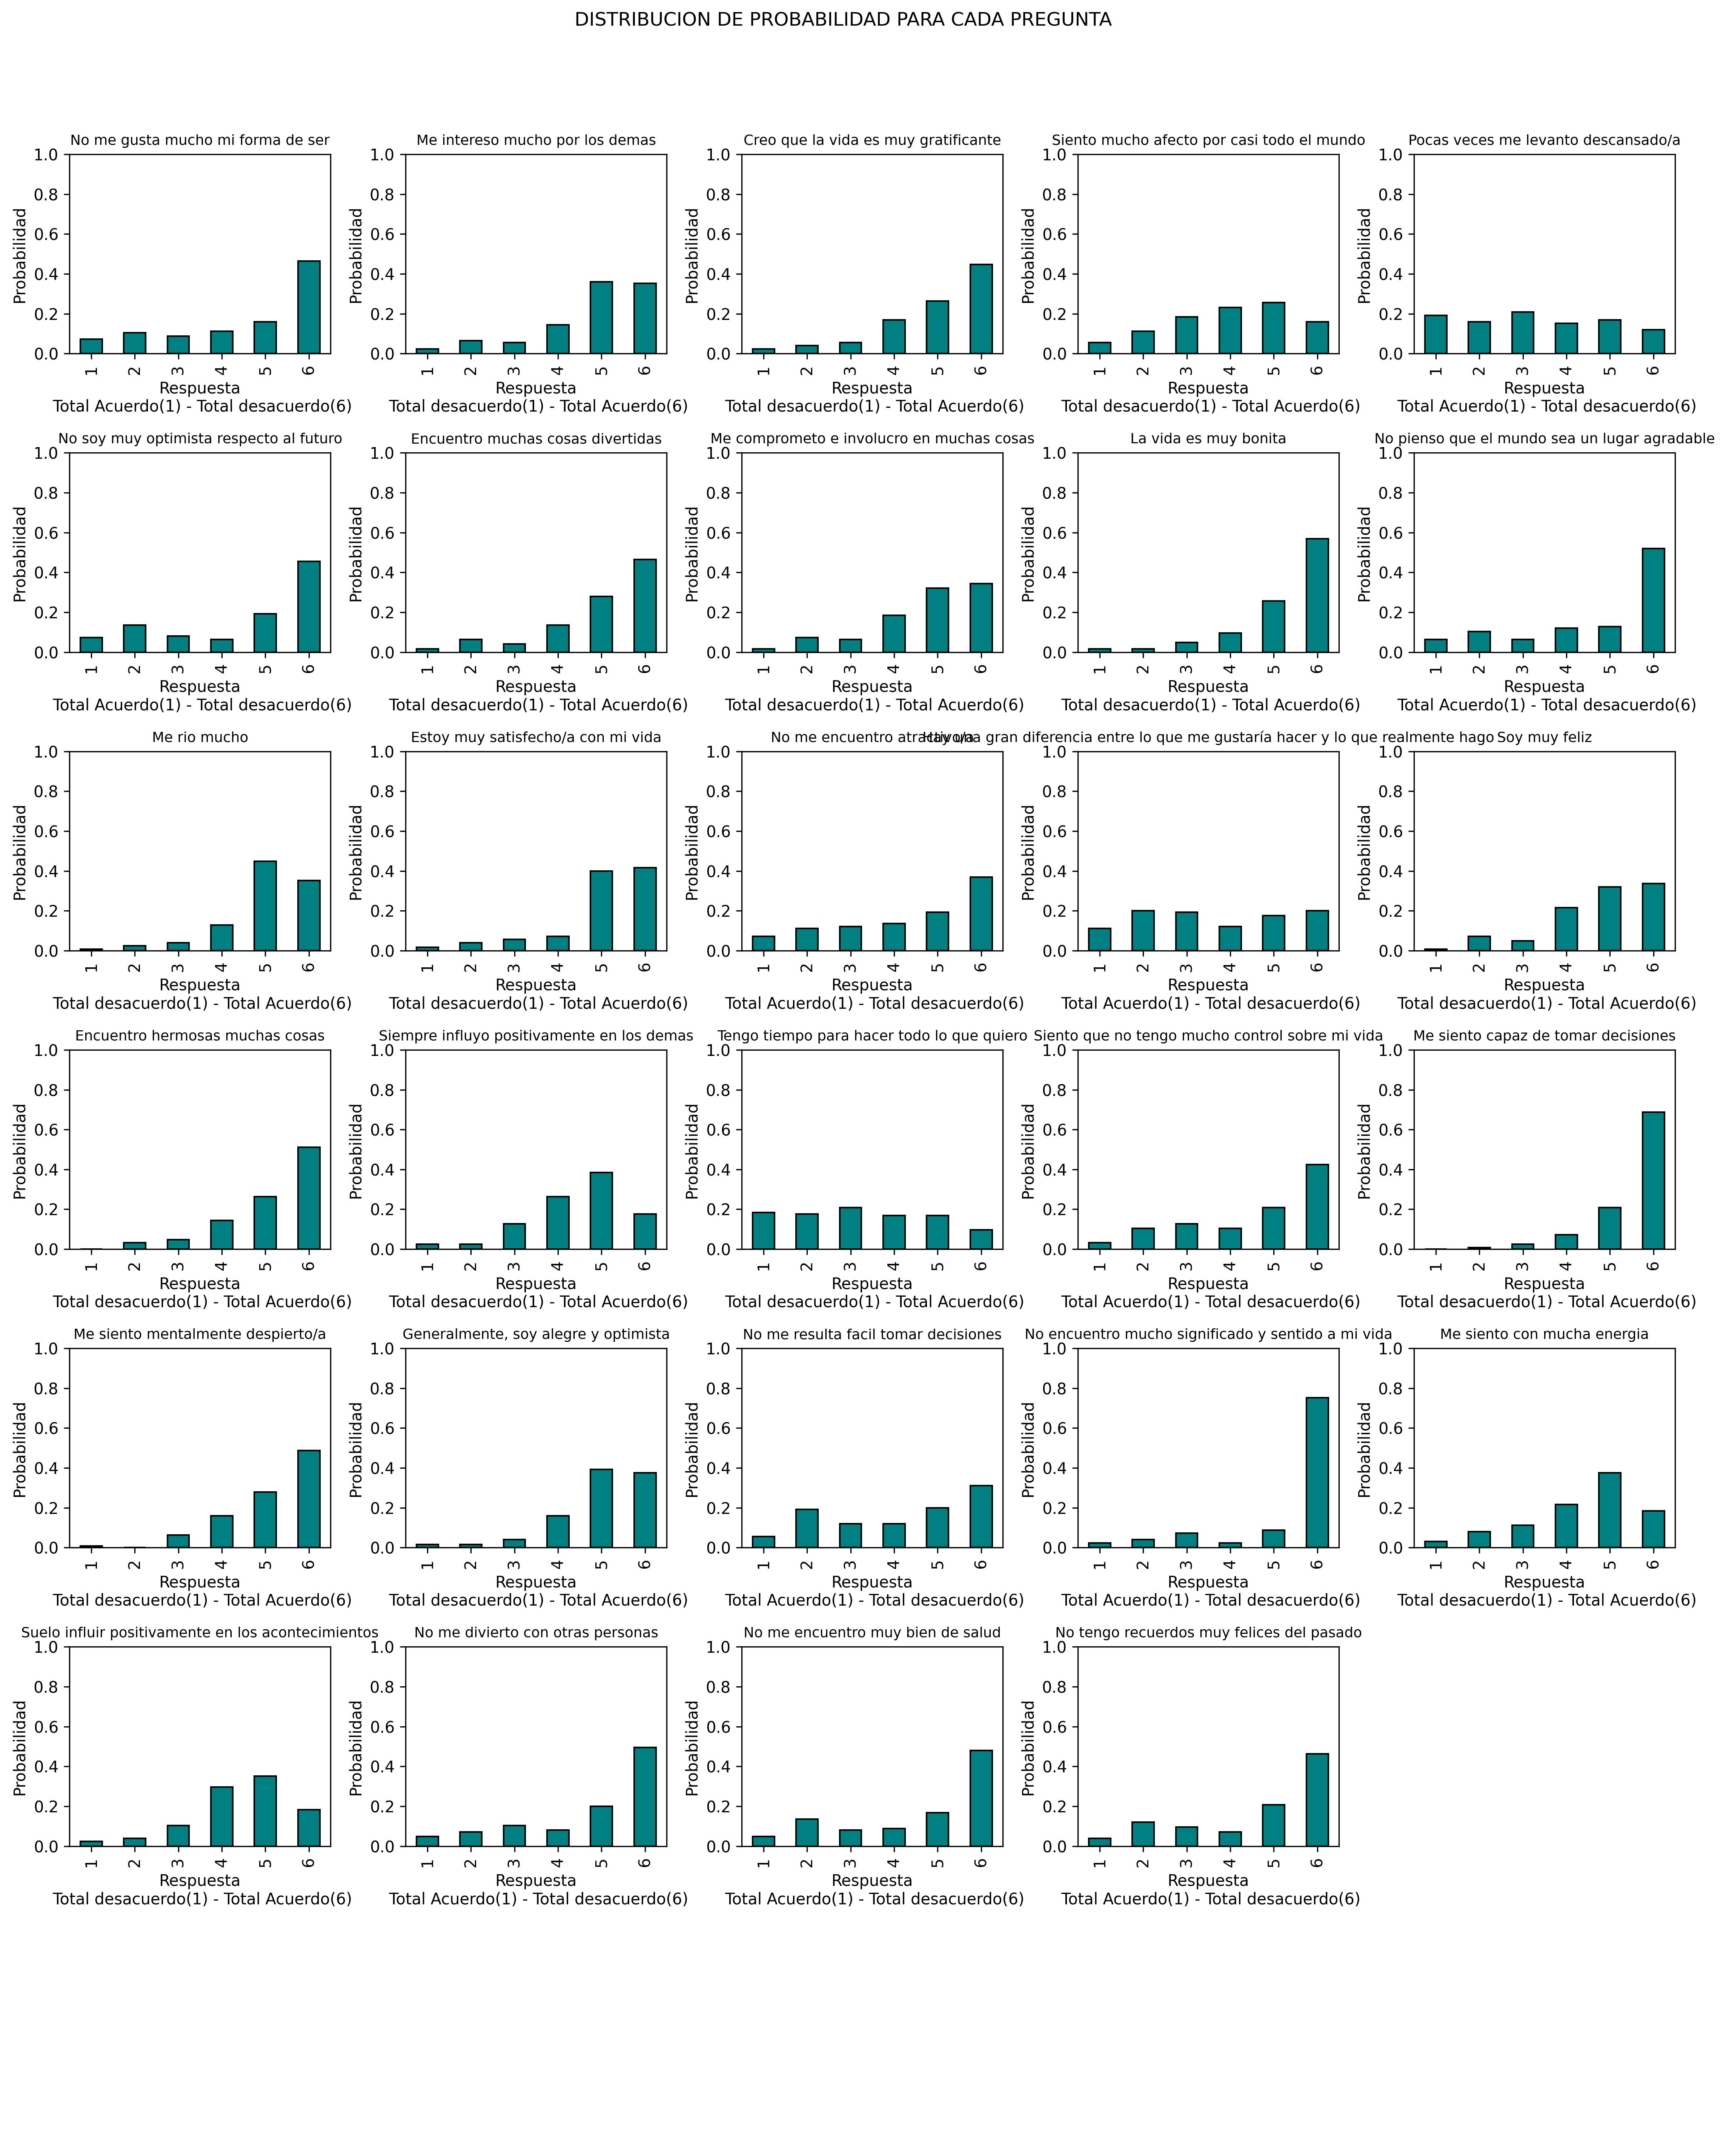

> **¿Cómo leo el gráfico?**

Estos gráficos muestran cómo se distribuyen las respuestas de los encuestados para cada afirmación del cuestionario, representando la probabilidad de cada categoría de respuesta.

- **Eje X (horizontal)**: Representa las opciones de respuesta para cada afirmación, que pueden ir desde "Total desacuerdo" (1) hasta "Total acuerdo" (6).
En las preguntas negativas, como "No me gusta mucho mi forma de ser" (A01), el eje X está invertido, mostrando "Total acuerdo (1) - Total desacuerdo (6)".

- **Eje Y (vertical)**: Representa la probabilidad estimada de que una respuesta caiga en cada categoría. Los valores van de 0 a 1 (0% a 100%).

- Cada gráfico tiene como título la afirmación completa de la pregunta.

- **Altura de la barra**: Muestra qué tan probable es que una respuesta esté en esa categoría. Una barra más alta indica una mayor proporción de respuestas en esa categoría.


---



> Interpretación de gráficos individualmente:

- En preguntas como "No le encuentro mucho significado a mi vida" y "Me siento capaz de tomar decisiones" se puede apreciar una **clara y gran diferencia entre la probabilidad** de que la respuesta sea 6 (Total desacuerdo y Total acuerdo respectivamente) y el resto de probabilidades.

- Por otro lado, en preguntas como "Tengo tiempo para hacer lo que quiero" y "Hay una gran diferencia entre lo que me gustaría hacer y lo que realmente hago", **no es muy visible o marcada la diferencia entre las probabilidades**, es decir, que estas se encuentras distribuidas mas o menos equitativamente entre las distintas respuestas.

Este conjunto de gráficos proporciona una visión visual y probabilística de cómo los encuestados respondieron a cada afirmación del cuestionario. Al observarlos, puedes identificar tendencias generales en la percepción de los encuestados y patrones que pueden ser útiles para análisis más profundos.




> EDA: Explorando más a profundidad cada columna



> `creando un grafico para ver la distribucion de la variable "Nivel_Felicidad"`

Nivel_Felicidad
Muy feliz                  43
Relativamente feliz        36
Poco feliz o satisfecho    29
Neutral                    15
Un poco infeliz             2
Name: count, dtype: int64


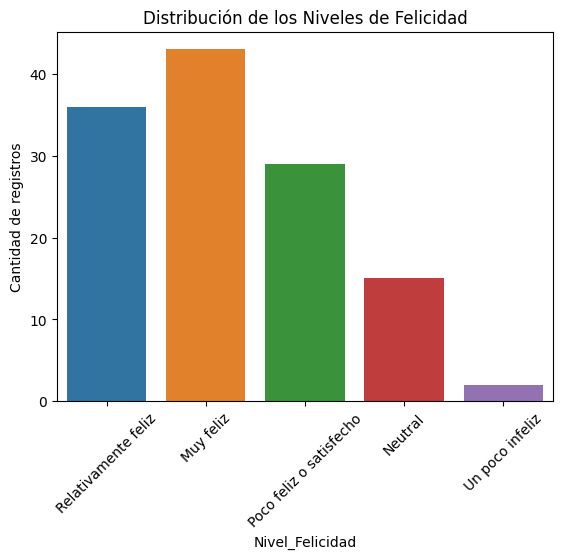

In [ ]:
print(ohq_df['Nivel_Felicidad'].value_counts())
sns.countplot(x='Nivel_Felicidad', data=ohq_df, hue="Nivel_Felicidad")
plt.ylabel("Cantidad de registros")
plt.title("Distribución de los Niveles de Felicidad")
plt.xticks(rotation=45)
plt.show()


☑ Primero podemos notar que **solo 5 de de 7 categorias se muestran en el gráfico**: "Relativamente Feliz", "Muy Feliz", "Poco Feliz", "Neutral" y "Un poco infeliz".
**"Infeliz" y "Demasiado Feliz" están ausentes** en el gráfico.

Esto se debe a que los puntajes de los encuestados entran en un rango de 2.4 a 5.96, fuera de los rangos de estas ultimas dos categorías, esto indica que no hay valores extremos entre los puntajes de los encuestados, sino más bien balanceados entre las categorias del centro.

☑  43 de 125 individuos entran dentro de la categoria **"Muy Feliz"**, reflejando un **34.4%** del total.

☑ 36 individuos entran dentro de la categoria **"Relativamente Feliz"**, reflejando el **28.8%** de la poblacion total.

☑ 29 individuos entran dentro de la categoria **"Poco feliz"**, reflejando un **23.2%** del total.

☑ 15 de los individuos entran dentro de la categoria **"Neutral"**, siendo estos el **12%** del total.

☑ Solo 2 de 125 individuos entran dentro de la categoria **"Un poco infeliz"**, conformando estos el **1.6%** de la población.


```
# creando un grafico de puntos para visualizar la distribucion de la columna "Puntaje"
```



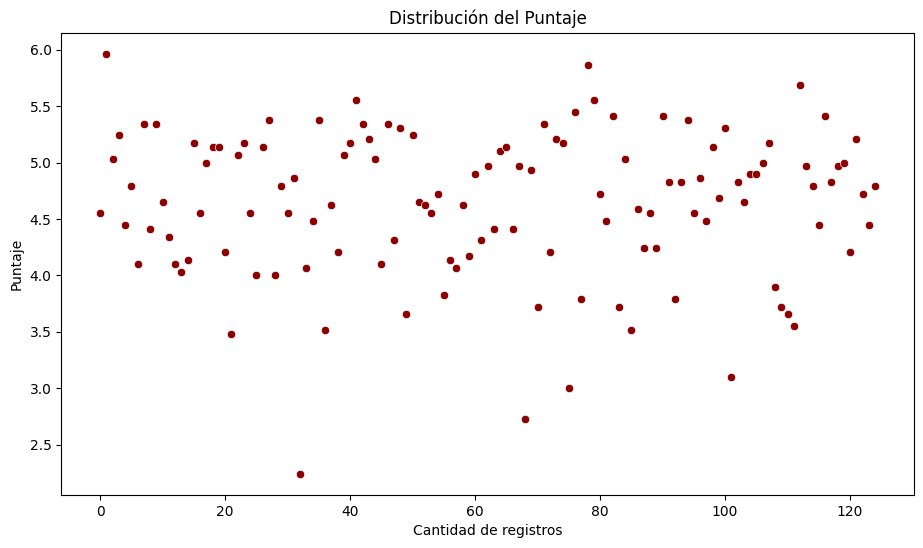

In [ ]:
plt.figure(figsize=(11, 6))
sns.scatterplot(ohq_df["Puntaje"], color="darkred")
plt.xlabel("Cantidad de registros")
plt.ylabel("Puntaje")
plt.title("Distribución del Puntaje")
plt.show()



> **Resultados:**

Se puede apreciar que los puntos en el gráfico no forman una figura en especifico, sino que mas bien se encuentran esparcidos por todo el gráfico sin presentar patrones. A su vez, la mayoria de los puntos se encuentran por encima de un puntaje de 3.5 y por debajo de un puntaje de 5.5.

Esto quiere decir que los individuos han obtenido puntajes relativamente diferentes, y que no hay puntajes en especifico que predominen mas que el resto en el conjunto de datos, pero si hay puntajes que no se ven con tanta frecuencia (valores atipicos, fuera de los valores promedio).







```
# creando un grafico de cajas y bigotes para visualizar la distribucion de "Puntaje" según "Nivel_Felicidad"
```



<ipython-input-15-8f4abc0f2b8d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Nivel_Felicidad', y='Puntaje', data=ohq_df, palette="YlGnBu")


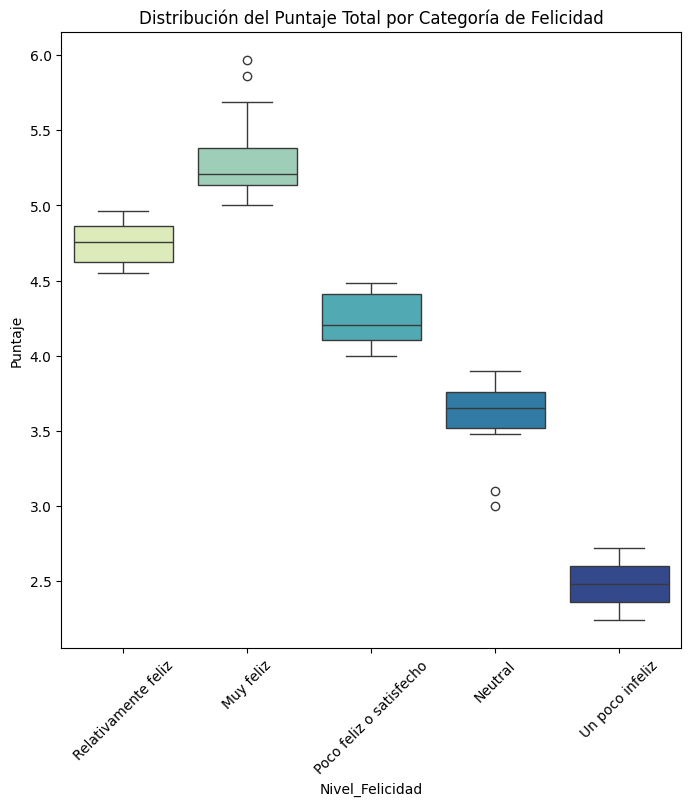

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='Nivel_Felicidad', y='Puntaje', data=ohq_df, palette="YlGnBu")
plt.title("Distribución del Puntaje Total por Categoría de Felicidad")
plt.xticks(rotation=45)
plt.show()


> **¿Cómo leo el gráfico?**

```
Los graficos de cajas te permiten visualizar rápidamente la dispersión, la asimetría y la presencia de valores atípicos.

▶ Caja: Representa el rango intercuartílico (IQR), que contiene el 50% central de los datos.
Un IQR grande indica una mayor dispersión de los datos, mientras que un IQR pequeño indica una menor dispersión.

▶ Línea central de la caja: Representa la mediana, es decir, el valor que divide los datos en dos partes iguales.
Si la mediana está más cerca del borde inferior de la caja, la distribución es asimétrica positiva (cola hacia la derecha).
Si la mediana está más cerca del borde superior, la distribución es asimétrica negativa.

▶ Bigotes: Se extienden desde la caja hasta los valores más extremos que aún se consideran dentro de un rango razonable.

▶Puntos aislados: Representan los valores atípicos, que están muy alejados del resto de los datos.
```




> **Resultados:**

El gráfico de distribución muestra que hay una clara tendencia en los datos: entre más alto el puntaje del encuestado, este entra en una categoria más alta.

- Categoría **"Neutral**":
Hay algunos valores fuera del rango de los bigotes, lo que indica la presencia de puntos atípicos en los valores más bajos razonables del puntaje.

- Categoría **"Muy Feliz"**:
También presenta algunos puntos atípicos hacia los valores más bajos del puntaje. La distribución es asimétrica positiva, con una concentración de puntajes más cerca del límite inferior.

- Categoría **"Poco Feliz"**:
Muestra una distribución asimétrica positiva, con puntajes más concentrados hacia los valores inferiores del rango, aunque también hay atípicos.


---


El gráfico sugiere que el puntaje total del cuestionario está relacionado de manera positiva con los niveles de felicidad. Sin embargo, la presencia de puntos atípicos y distribuciones asimétricas en algunas categorías indica que ciertos individuos pueden no encajar perfectamente en los rangos esperados para su nivel de felicidad.




 # **Conclusiones, recomendaciones y siguientes pasos**


---
El análisis del **cuestionario de felicidad de Oxford** proporcionó una visión inicial sobre cómo los empleados del **Consejo Provincial de Educacion de Neuquén** perciben su bienestar emocional y mental.

- Los encuestados mostraron un alto nivel de acuerdo con preguntas relacionadas con la satisfacción con la vida y el **optimismo**, mientras que las preguntas que evalúan percepciones negativas (como la autocrítica o el control sobre la vida) presentaron un poco más de variabilidad.

- Los resultados reflejaron **niveles significativamente mayores** de acuerdo con afirmaciones relacionadas con autoestima, significado de vida y percepción de logro personal.

- **No se vieron resultados** promedios que sean **alarmantes ni muy bajos**, a pesar de que hubieron preguntas con respuestas promedio más bajas, no indica que los individuos encuestados perciban su vida o bien estar negativamente.


A pesar de estos hallazgos, el actual conjunto de datos limita considerablemente el alcance del análisis, siendo restringido a observaciones generales que no pueden ser utilizadas para diseñar estrategias personalizadas.

Los datos se recolectaron de forma anónima, por lo que no se cuenta con información contextual demográfica o laboral de los encuestados. Esto **impide identificar patrones** específicos entre grupos, **comprobar o rechazar** posbiles **hipotesis**, **realizar modelos estadisticos** más avanzados o utilizar Machine Learning para **predecir variables**.


Otra importante limitación para el análisis implica la **imputación de las respuestas a mano**, dando oportunidad a errores como preguntas con más de una respuesta o preguntas dejadas en blanco. Las respuestas inconsistentes no sirven para el análisis y deben ser retiradas, para evitar pérdida de valiosos datos es preferible evitar la imputación de respuestas a mano.

Como siguientes pasos para conseguir un mejor análisis en proximos avances del proyecto, se recomienda:

 💡 **Implementar** una próxima ronda de cuestionarios que incluya **preguntas sobre sexo, edad, estado civil, hijos**, profesión, jornada laboral, antigüedad, departamento al que pertenece, **entre otros**.

 💡 **Implementar el uso de cuestionarios online** para automatizar el ingreso y procesamiento de los datos.

 💡 Centralizar los datos en una **base de datos relacional** (como MySQL o PostgreSQL) facilitará la gestión de información y permitirá:

1. Realizar consultas complejas y análisis detallados con mayor rapidez.
Comparar datos históricos con nuevas rondas de encuestas.
2. Identificar tendencias longitudinales que reflejen mejoras o áreas de preocupación en el bienestar de los empleados.

💡 **Diseñar un dashboard interactivo**. Crear un dashboard visual que permite explorar los datos en tiempo real y filtrar por variables clave, dando mejor entendimiento de los hallazgos.

💡 **Desarrollar una presentación de diapositivas** para compartir los hallazgos y recomendaciones, evitando bloques de código difíciles de entender y enfatizando cómo los hallazgos pueden impactar positivamente en el bienestar emocional de los empleados y, en consecuencia, en la productividad y satisfacción laboral.

💡 Utilizar el cuestionario digital junto con la base de datos para realizar un futuro **análisis longitudinal**, identificando si las iniciativas implementadas logran mejoras significativas en los niveles de felicidad reportados.



# **Referencias**


---

- [Documentación oficial de Python](https://docs.python.org/es/3/)

- [Documentación oficial de Pandas](https://pandas.pydata.org/docs/)